# 03 - Risk Analysis: Shipment Delay Patterns

This notebook identifies high-risk routes and carriers based on average delivery delays.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

## Load Data

In [2]:
df = pd.read_csv('../data/processed/fedex_cleaned.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,...,Source,Destination,Distance,Delivery_Status,Pickup_Date,Delivery_Date,Delay,Pickup_DayOfWeek,Is_Weekend,Pickup_Weekday
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,...,IAD,TPA,810,0.0,2008-01-03,2008-01-11,8.0,3,False,Thursday
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,...,IAD,TPA,810,1.0,2008-01-03,2008-01-22,19.0,3,False,Thursday
2,2008,1,3,4,628.0,620,750,WN,448,90.0,...,IND,BWI,515,0.0,2008-01-03,2008-01-11,8.0,3,False,Thursday
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,...,IND,BWI,515,0.0,2008-01-03,2007-12-30,-4.0,3,False,Thursday
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,...,IND,BWI,515,1.0,2008-01-03,2008-02-06,34.0,3,False,Thursday


## Delay by Carrier

/var/folders/jf/dhndmwmx40q3k1kyzdlczlq00000gn/T/ipykernel_31777/296880131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=carrier_avg, x='Carrier_Name', y='Delay', palette='viridis')


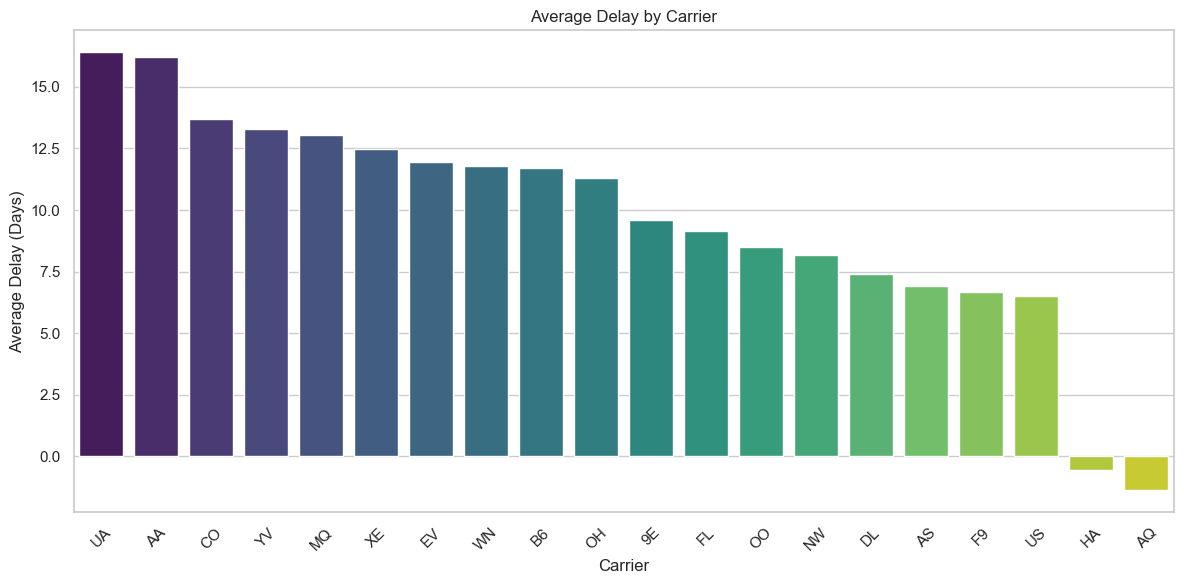

In [3]:
carrier_avg = df.groupby('Carrier_Name')['Delay'].mean().reset_index().sort_values(by='Delay', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=carrier_avg, x='Carrier_Name', y='Delay', palette='viridis')
plt.title('Average Delay by Carrier')
plt.xticks(rotation=45)
plt.ylabel('Average Delay (Days)')
plt.xlabel('Carrier')
plt.tight_layout()
plt.show()

## Delay by Route (Source-Destination)

In [4]:
delay_by_route = df.groupby(['Source', 'Destination'])['Delay'].mean().reset_index()
delay_by_route = delay_by_route.sort_values(by='Delay', ascending=False)

# Top 10 high-risk routes
high_risk_routes = delay_by_route.head(10)
high_risk_routes

,Source,Destination,Delay
4489,SBN,CVG,518.0
4529,SDF,SPI,329.0
2122,HPN,PIA,298.0
5122,TUL,PIA,243.0
3687,ONT,SAN,221.0
2336,ICT,PIA,215.0
56,ACV,SJC,211.0
4278,RIC,ORF,205.0
989,CMH,GRB,195.0
2337,ICT,SGF,191.0


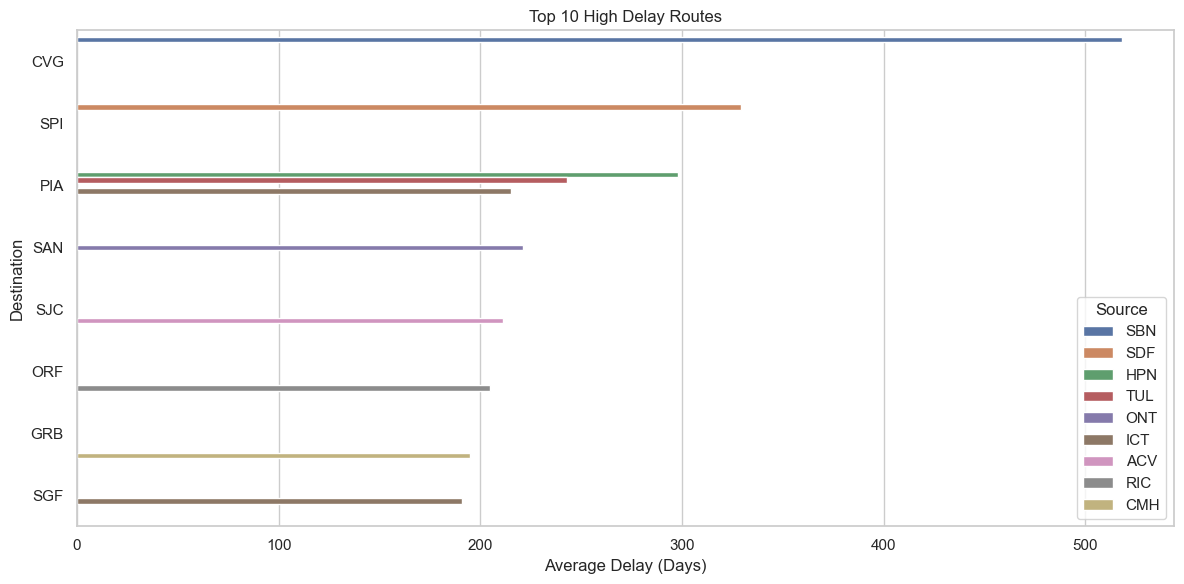

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(data=high_risk_routes, x='Delay', y='Destination', hue='Source')
plt.title('Top 10 High Delay Routes')
plt.xlabel('Average Delay (Days)')
plt.tight_layout()
plt.show()

## Save High-Risk Route Info

In [6]:
high_risk_routes.to_csv('../data/processed/route_risk_scores.csv', index=False)